# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&q=London&units={units}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [5]:
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 41.72,
  'feels_like': 34.93,
  'temp_min': 39.99,
  'temp_max': 43,
  'pressure': 1007,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 230},
 'clouds': {'all': 0},
 'dt': 1612402736,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1612424039,
  'sunset': 1612457692},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
weather_json
time.sleep(5)
print(weather_json['coord']['lat'])
print(weather_json['coord']['lon'])
print(weather_json['main']['temp_max'])
print(weather_json['main']['humidity'])
print(weather_json['clouds']['all'])
print(weather_json['wind']['speed'])
print(weather_json['sys']['country'])
print(weather_json['dt'])

51.5085
-0.1257
43
81
0
6.91
GB
1612402736


In [7]:
print(f'Beginning Data Retrieval')
print('-----------------------------')
city_list=[]

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        lat_list = weather_json['coord']['lat']
        lng_list = weather_json['coord']['lon']
        max_temp_list = weather_json['main']['temp_max']
        humidity_list = weather_json['main']['humidity']
        cloudiness_list = weather_json['clouds']['all']
        wind_speed_list = weather_json['wind']['speed']
        country_list = weather_json['sys']['country']
        date_list = weather_json['dt']
        
        
        city_list.append({
            "Latitude":lat_list,
            "Longitude":lng_list,
            "Maximum Temperature":max_temp_list,
            "Humidity":humidity_list,
            "Cloudiness":cloudiness_list,
            "Wind Speed":wind_speed_list,
            "Country":country_list,
            "Date":date_list
        })

    except: 
        print("City Not Found")
city_list


Beginning Data Retrieval
-----------------------------
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found


[{'Latitude': 62.456,
  'Longitude': -114.3525,
  'Maximum Temperature': -18,
  'Humidity': 76,
  'Cloudiness': 90,
  'Wind Speed': 6.91,
  'Country': 'CA',
  'Date': 1612403374},
 {'Latitude': 65.6145,
  'Longitude': -37.6368,
  'Maximum Temperature': 20.48,
  'Humidity': 95,
  'Cloudiness': 84,
  'Wind Speed': 11.65,
  'Country': 'GL',
  'Date': 1612403289},
 {'Latitude': 65.8522,
  'Longitude': 44.24,
  'Maximum Temperature': -1.03,
  'Humidity': 93,
  'Cloudiness': 50,
  'Wind Speed': 5.64,
  'Country': 'RU',
  'Date': 1612403321},
 {'Latitude': 69.4541,
  'Longitude': -133.0374,
  'Maximum Temperature': -41.8,
  'Humidity': 66,
  'Cloudiness': 20,
  'Wind Speed': 6.91,
  'Country': 'CA',
  'Date': 1612403285},
 {'Latitude': -33.9258,
  'Longitude': 18.4232,
  'Maximum Temperature': 69.01,
  'Humidity': 77,
  'Cloudiness': 20,
  'Wind Speed': 12.66,
  'Country': 'ZA',
  'Date': 1612403169},
 {'Latitude': -21.3585,
  'Longitude': 55.7679,
  'Maximum Temperature': 75.99,
  'Humidity'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame(city_list)
   

print(weather_df.head())

weather_df.to_csv('cities.csv', index = False)

   Latitude  Longitude  Maximum Temperature  Humidity  Cloudiness  Wind Speed  \
0   62.4560  -114.3525               -18.00        76          90        6.91   
1   65.6145   -37.6368                20.48        95          84       11.65   
2   65.8522    44.2400                -1.03        93          50        5.64   
3   69.4541  -133.0374               -41.80        66          20        6.91   
4  -33.9258    18.4232                69.01        77          20       12.66   

  Country        Date  
0      CA  1612403374  
1      GL  1612403289  
2      RU  1612403321  
3      CA  1612403285  
4      ZA  1612403169  


In [9]:
weather_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.563383,24.199202,50.495451,72.700885,48.472566,8.226000,1.612403e+09
std,32.845312,89.333290,30.856328,20.063748,40.463994,5.932034,6.421219e+01
min,-54.800000,-175.200000,-46.770000,1.000000,0.000000,0.360000,1.612403e+09
25%,-3.800400,-55.983600,33.800000,63.000000,1.000000,3.620000,1.612403e+09
50%,22.600000,26.891000,60.800000,77.000000,44.000000,6.910000,1.612403e+09
75%,48.649900,103.716700,75.510000,87.000000,90.000000,11.500000,1.612403e+09
max,78.218600,178.004200,93.200000,100.000000,100.000000,33.550000,1.612403e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_humidity_df = weather_df.loc[weather_df["Humidity"]<100]
weather_humidity_df



,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,62.4560,-114.3525,-18.00,76,90,6.91,CA,1612403374
1,65.6145,-37.6368,20.48,95,84,11.65,GL,1612403289
2,65.8522,44.2400,-1.03,93,50,5.64,RU,1612403321
3,69.4541,-133.0374,-41.80,66,20,6.91,CA,1612403285
4,-33.9258,18.4232,69.01,77,20,12.66,ZA,1612403169
...,...,...,...,...,...,...,...,...
560,41.7589,69.3864,37.40,60,0,4.61,KZ,1612403436
561,53.8319,80.3406,13.28,96,86,6.26,RU,1612403436
562,67.5447,133.3850,-42.57,70,0,2.30,RU,1612403436
563,44.0759,9.9112,54.00,92,100,11.12,IT,1612403436


In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_humidity_100_df = weather_df.loc[weather_df["Humidity"]>=100].index
weather_humidity_100_df

Int64Index([13, 50, 115, 185, 191, 194, 209, 244, 289, 332, 416, 455, 477,
            515],
           dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_humidity_100_df)
clean_city_data

,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,62.4560,-114.3525,-18.00,76,90,6.91,CA,1612403374
1,65.6145,-37.6368,20.48,95,84,11.65,GL,1612403289
2,65.8522,44.2400,-1.03,93,50,5.64,RU,1612403321
3,69.4541,-133.0374,-41.80,66,20,6.91,CA,1612403285
4,-33.9258,18.4232,69.01,77,20,12.66,ZA,1612403169
...,...,...,...,...,...,...,...,...
560,41.7589,69.3864,37.40,60,0,4.61,KZ,1612403436
561,53.8319,80.3406,13.28,96,86,6.26,RU,1612403436
562,67.5447,133.3850,-42.57,70,0,2.30,RU,1612403436
563,44.0759,9.9112,54.00,92,100,11.12,IT,1612403436


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

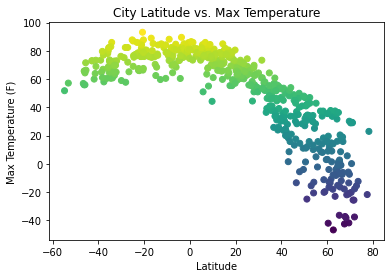

In [13]:
plt.scatter(clean_city_data['Latitude'],clean_city_data["Maximum Temperature"],c=clean_city_data["Maximum Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

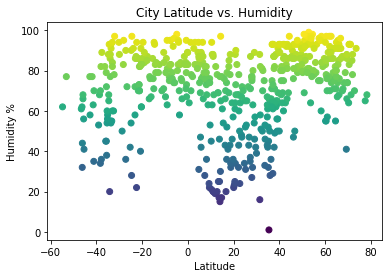

In [14]:
plt.scatter(clean_city_data['Latitude'],clean_city_data["Humidity"],c=clean_city_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

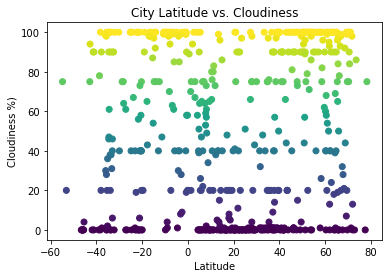

In [15]:
plt.scatter(clean_city_data['Latitude'],clean_city_data["Cloudiness"],c=clean_city_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %)")
plt.title("City Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

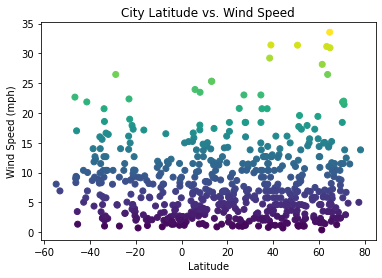

In [16]:
plt.scatter(clean_city_data['Latitude'],clean_city_data["Wind Speed"],c=clean_city_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

## Linear Regression

In [17]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()